<H1>Data analysis and machine learning using custom Neural Network (w/o any scify libraries)</H1>
This is my first kernel at Kaggle. I am also a beginner in data science and machine learning.

To understand details and advanced concepts in ML, I thought I'll start with simple concepts for my learning or for anyone else in my position.

As a result, below is a simple neural network made from scratch in python. I will be updating the text explaining the basics of the network and creating new (and simple) network for different datasets as I go along.

Comments/Crits/Corrections welcome. Thanks!

In [276]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

<H2>Load Data</H2>

In [277]:
# load iris database
data = pd.read_csv('BreastTissue.csv')
data.sample(n=5)

,Case #,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P,Class
43,44,252.000000,0.106116,0.031416,38.544210,493.790423,12.811014,25.541145,28.867040,280.658299,mas
84,85,2100.000000,0.061959,-0.045379,390.482507,16640.723620,42.615798,125.900413,380.644703,2073.028685,adi
45,46,121.000000,0.174184,0.090757,24.437180,144.466513,5.911750,22.021080,10.594708,141.766185,mas
4,5,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503,car
86,87,2100.000000,0.121649,0.377689,450.551667,35671.606290,79.173176,436.099640,113.198570,2461.450497,adi


In [278]:
print(data.Class.unique())


['car' 'fad' 'mas' 'gla' 'con' 'adi']


In [279]:
data.describe()

,Case #,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,53.500000,784.251618,0.120133,0.114691,190.568642,7335.155161,23.473784,75.381258,166.710575,810.638127
std,30.743563,753.950075,0.068596,0.101347,190.801448,18580.314212,23.354672,81.345838,181.309580,763.019135
min,1.000000,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,27.250000,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,53.500000,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,79.750000,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,106.000000,2800.000000,0.358316,0.467748,1063.441427,174480.476200,164.071543,436.099640,977.552367,2896.582483


In [280]:
data.columns


Index(['Case #', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR',
       'P', 'Class'],
      dtype='object')

In [281]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.pairplot(data, hue='Class', vars=['I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR','P'])
#plt.show()

C:\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


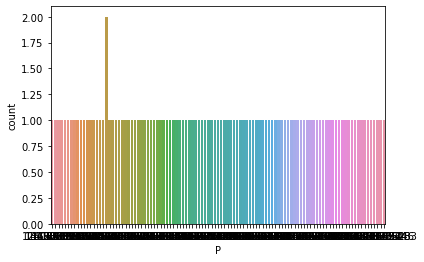

In [282]:
sns.countplot(data.P)
plt.show()

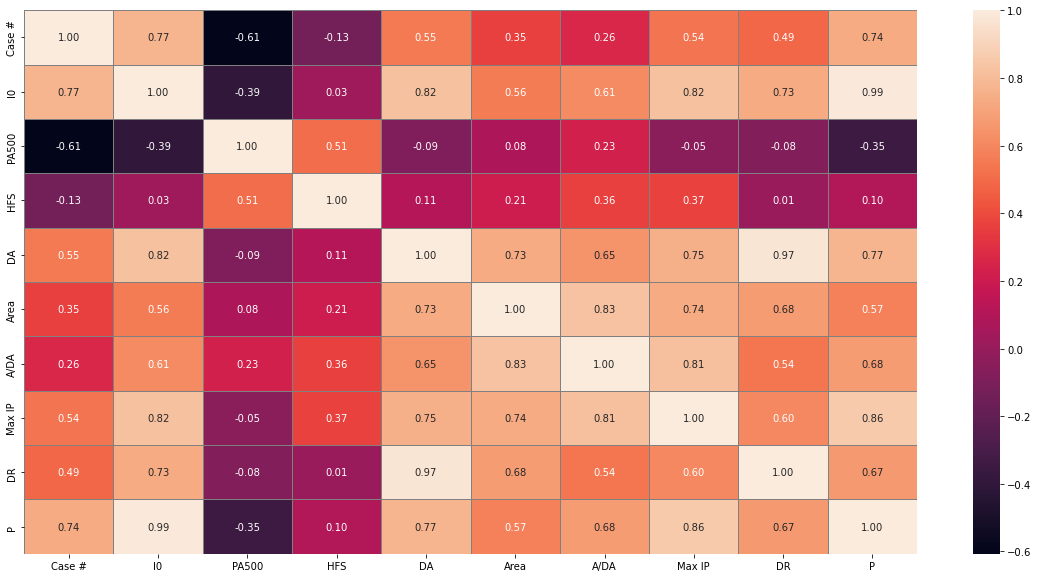

In [283]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, linewidth=.5, fmt='.2f', linecolor = 'grey')
plt.show()

In [284]:
# simple visualization to show how the inputs compare against each other
#sns.pairplot( data=data, vars=('I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR',
#       'P'), hue='Class' )

<H2>Normalize the data</H2>

In [285]:
data.columns


Index(['Case #', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR',
       'P', 'Class'],
      dtype='object')

In [286]:
df_norm = data[['I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR',
       'P']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
54,0.136269,0.332492,0.248366,0.125098,0.014836,0.099075,0.092476,0.153783,0.132232
11,0.147201,0.621090,0.219608,0.191271,0.055897,0.265772,0.160931,0.219418,0.172301
78,0.503801,0.082240,0.216993,0.356582,0.031555,0.077730,0.115065,0.402207,0.470436
77,0.218380,0.039354,0.286275,0.163853,0.001341,0.000000,0.037388,0.201073,0.169338
84,0.740452,0.143290,0.039216,0.355276,0.095008,0.252469,0.275457,0.395114,0.702860


In [287]:
df_norm.describe()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.252596,0.311458,0.338931,0.163750,0.041653,0.134654,0.157458,0.178320,0.247387
std,0.279551,0.198298,0.189763,0.182796,0.106532,0.143742,0.190002,0.183733,0.275299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.054505,0.159057,0.206536,0.032763,0.001945,0.040527,0.044204,0.051721,0.052402
50%,0.104537,0.268920,0.286275,0.096887,0.012322,0.089477,0.084664,0.108522,0.118751
75%,0.513530,0.454465,0.435948,0.225799,0.043259,0.180689,0.176822,0.245486,0.424513
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Convert the Species labels to indexes for use with neural network.<BR>
Iris-setoso = 0<BR>
Iris-versicolor = 1<BR>
Iris-virginica = 2<BR>

In [288]:
    target = data[['Class']].replace(['car','fad','mas','gla','con','adi'],[0,1,2,3,4,5])
target.sample(n=5)

,Class
42,2
20,0
94,5
90,5
59,3


In [289]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P,Class
4,0.096341,0.544400,0.581699,0.100848,0.018462,0.152308,0.143462,0.114636,0.108175,0
62,0.027809,0.396569,0.309804,0.019777,0.002316,0.062648,0.041931,0.040639,0.030380,3
52,0.066119,0.635721,0.943791,0.132437,0.030014,0.196987,0.089729,0.162316,0.098830,2
91,0.833148,0.199798,0.632680,0.474846,0.158754,0.321736,0.657743,0.441310,0.841642,5
93,0.666296,0.121594,0.337255,0.242357,0.042493,0.159087,0.304558,0.247420,0.649277,5


<H2>Mark some of the data for testing purpose.</H2>
We'll test our network on unseen data.

In [290]:
train_test_per = 75/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P,Class,train
24,0.092568,0.316852,0.294118,0.046829,0.005709,0.085935,0.083440,0.062880,0.092998,1,True
53,0.083055,0.371847,0.282353,0.054192,0.009141,0.124614,0.082341,0.072992,0.091746,2,False
8,0.136077,0.580222,0.546405,0.158022,0.046528,0.263102,0.178716,0.175698,0.172585,0,False
76,0.202818,0.082745,0.396078,0.188891,0.002048,0.002315,0.060253,0.226410,0.145663,4,True
93,0.666296,0.121594,0.337255,0.242357,0.042493,0.159087,0.304558,0.247420,0.649277,5,True


<H2>Separate train and test Data</H2>

In [291]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P,Class
71,0.475589,0.231080,0.291503,0.175161,0.049966,0.257216,0.315612,0.154554,0.504989,4
60,0.034854,0.347629,0.262745,0.013233,0.001945,0.065529,0.044435,0.029420,0.038536,3
77,0.218380,0.039354,0.286275,0.163853,0.001341,0.000000,0.037388,0.201073,0.169338,4
104,0.814609,0.094349,0.380392,0.158842,0.028759,0.158987,0.398763,0.059638,0.849910,5
57,0.074156,0.147326,0.198693,0.002798,0.000184,0.018133,0.032378,0.015178,0.070958,3


In [292]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P,Class
81,0.432950,0.192230,0.247059,0.513228,0.020312,0.030220,0.142043,0.567824,0.277893,4
98,0.825673,0.155399,0.785621,0.342602,0.145052,0.404066,0.766369,0.183059,0.924179,5
36,0.027809,0.458123,0.522876,0.020976,0.002402,0.062693,0.064884,0.030827,0.032807,2
25,0.052019,0.079717,0.249673,0.046846,0.001798,0.024652,0.004724,0.078105,0.050030,1
29,0.093437,0.149344,0.282353,0.066978,0.005524,0.061229,0.045766,0.097115,0.089140,1


In [293]:
X = train.values[:,:9]
X[:10]

array([[1.66436517e-01, 6.36226034e-01, 2.43137256e-01, 2.34871366e-01,
        6.77596595e-02, 2.66496061e-01, 1.63091523e-01, 2.66558891e-01,
        1.91871170e-01],
       [5.73600297e-01, 1.01917256e-01, 2.05228758e-01, 2.44088936e-01,
        3.29939069e-02, 1.20817903e-01, 1.71141104e-01, 2.75010726e-01,
        5.33298346e-01],
       [7.03374119e-01, 1.58425831e-01, 3.56862746e-01, 2.97591333e-01,
        8.77854886e-02, 2.76812356e-01, 3.76588599e-01, 2.96812195e-01,
        6.99268260e-01],
       [8.76931953e-02, 9.53582246e-02, 1.80392157e-01, 6.60879023e-02,
        1.49449044e-03, 1.31699650e-02, 2.76943300e-02, 9.81737828e-02,
        6.59598694e-02],
       [1.06367437e-01, 3.98082746e-01, 3.07189543e-01, 9.48253849e-02,
        1.37900932e-02, 1.18619995e-01, 9.76065255e-02, 1.18506960e-01,
        1.09830710e-01],
       [6.17337584e-02, 5.64076690e-01, 1.96078433e-01, 5.82140059e-02,
        1.08547587e-02, 1.40475333e-01, 8.58881586e-02, 7.71131230e-02,
        7.3

In [294]:
targets = [[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,9:10]])
y[:5]

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

<H2>Create backpropagating neural network</H2>
Create 3 layers: Input, hidden and Output.

Inputs = length and widths of the species<BR>
Output = 3 values, each one indicating a species. ie Values 1, 0, 0 for the output indicates Iris-setosa<BR>
w1 is a matrices of weight connecting Input and the hidden layer. Each node in input layer connects to each node in the hidden layer.

Weight are randomized between -1 and 1.

In [295]:
num_inputs = len(X[0])
hidden_layer_neurons = 11
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765,
        -0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694,
         0.55876584],
       [-0.60462985,  0.72598647,  0.96680135, -0.67231552,  0.19466789,
        -0.9820278 , -0.22685743, -0.91167988,  0.91330594, -0.12770671,
         0.89795461],
       [ 0.57261197,  0.7325786 , -0.65366916, -0.85010283,  0.20148544,
        -0.66405563,  0.46676034, -0.18311228,  0.05581765,  0.87514317,
         0.04339224],
       [-0.78361323, -0.68355319,  0.0904053 ,  0.04880816,  0.27522049,
        -0.19700911,  0.29961022, -0.20619999,  0.24783223,  0.53480993,
        -0.64205218],
       [-0.24884846,  0.00506612,  0.37333416, -0.4926407 ,  0.10948173,
         0.24986169,  0.79100233, -0.27429282,  0.27511415, -0.6171072 ,
        -0.00441177],
       [-0.63510919,  0.83676608, -0.13635586,  0.6603762 , -0.16644739,
         0.80933518, -0.19034957, -0.33765099,  0.14427754,  0.6908873 ,
         0.722

<H3>w2 are the weights of connections between hidden layer and output layer.</H3>

In [296]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.12646742, -0.47815569, -0.17505558, -0.16193193,  0.80484371,
         0.95923252],
       [ 0.24713768, -0.83363175,  0.46599744,  0.3573708 ,  0.65204573,
        -0.30509733],
       [-0.88223981,  0.22364363, -0.75197076,  0.51905906,  0.58884664,
        -0.18274643],
       [ 0.88759501, -0.65244041,  0.8851717 , -0.06902065,  0.52598728,
         0.50564039],
       [ 0.96241984,  0.94655599, -0.91981775, -0.96805744,  0.08658063,
        -0.93224476],
       [ 0.31496927,  0.0698052 ,  0.33311679, -0.11731859, -0.45505708,
         0.89933788],
       [ 0.45653888, -0.98735213, -0.80134447,  0.26338449, -0.42392635,
        -0.18475665],
       [ 0.56306225, -0.29170892,  0.85161719,  0.44090424,  0.10385288,
        -0.63807033],
       [-0.18081722,  0.52576358,  0.98159364, -0.85269525, -0.73049479,
         0.48008946],
       [ 0.66756274, -0.82245429,  0.6588359 ,  0.57346463,  0.37644255,
        -0.32014717],
       [-0.11091867, -0.26732772,  0.68093213, -0.

<H2>Train the network by updating the weights using backpropogation.</H2>
This is the crux of the network. The layers are fed forward using sigmoid activation function. The weighs are then updated based on error using gradient descent.

<pre>
Forward Propagation ( use current weights to caluculate output ):
> node activation = output from previous layer (network inputs in case of first layer) * weights
> node output = sigmoid activation function = 1 / ( 1 + exp( node activation ) )

Backpropagation ( update network weights ):
Error calculation ( how far off we are from the expected values ):
> derivative (different for different activation functions) = output * ( 1 - output )
> error (for the last layer) = ( expected - output ) * derivative
> error (for other layers) = ( error calulated previously * that layer's weight ) * derivative
Update weight based on error caculated:
> Weight = weight + ( output * error * learning rate )
</pre>

In [297]:
# taken from> https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

**A Graphical representations of our network will be something like below**<BR>
The first set of 4 nodes is the input.<BR>
The second set of 5 nodes is the hidden layer. <BR>
The last set of 3 nodes is the output layer.<BR><BR>
All the nodes of a layer are fully connected to all nodes of the next layer.

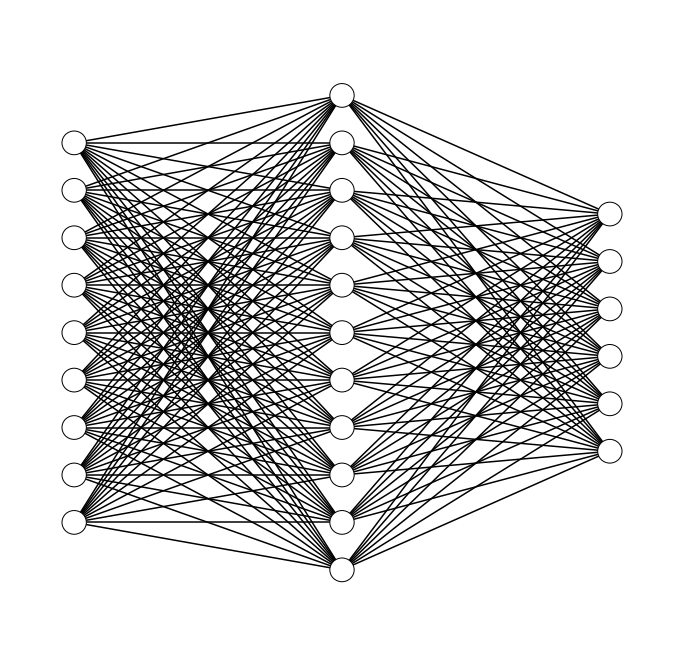

In [304]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [9, 11, 6])

The sigmoid activation function squashes the input values between 0 and 1. This provides a consistant way for the network to deal with outputs.

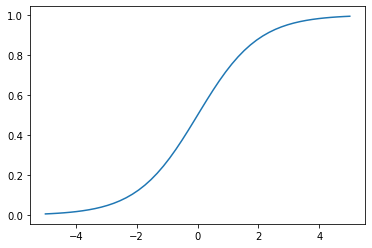

In [299]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

## Training

In [300]:
learning_rate = 0.2 # slowly update the network
error = []
for epoch in range(1000):
    # activate the first layer using the input
    #   matrix multiplication between the input and the layer 1 weights
    #   result is fed into a sigmoid function
    l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
    # activate the second layer using first layer as input
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    # find the average errorof this batch
    #   using absolute, can use use square as well
    er = (abs(y - l2)).mean()
    error.append(er)
    
    # BACKPROPAGATION / learning!
    # find contribution of error on each weight on the second layer
    l2_delta = (y - l2)*(l2 * (1-l2))
    # update each weight in the second layer slowly
    w2 += l1.T.dot(l2_delta) * learning_rate
    
    # find contribution of error on each weight on the second layer w.r.t the first layer
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    # udpate weights in the first layer
    w1 += X.T.dot(l1_delta) * learning_rate
    
print('Error:', er)

Error: 0.10883462678585987


### Plotting Error

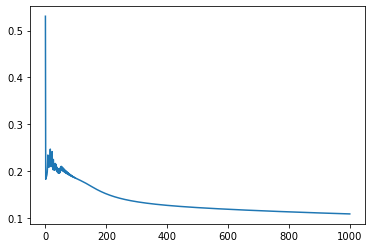

In [301]:
plt.plot(error)

<H2>Test the network for accuracy.</H2>
Run the network with the updated weights from training.

In [302]:
X = test.values[:,:9]
y = np.array([targets[int(x)] for x in test.values[:,9:10]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

array([[0.864, 0.068, 0.043, 0.056, 0.003, 0.   ],
       [0.305, 0.202, 0.181, 0.147, 0.005, 0.   ],
       [0.989, 0.045, 0.023, 0.012, 0.006, 0.   ],
       [0.995, 0.037, 0.03 , 0.008, 0.008, 0.   ],
       [0.001, 0.304, 0.32 , 0.151, 0.028, 0.   ],
       [0.001, 0.35 , 0.255, 0.335, 0.004, 0.   ],
       [0.011, 0.181, 0.166, 0.061, 0.032, 0.   ],
       [0.02 , 0.329, 0.347, 0.173, 0.011, 0.   ],
       [0.071, 0.19 , 0.148, 0.081, 0.011, 0.   ],
       [0.013, 0.43 , 0.439, 0.617, 0.001, 0.   ],
       [0.082, 0.182, 0.133, 0.423, 0.001, 0.   ],
       [0.055, 0.2  , 0.138, 0.461, 0.001, 0.   ],
       [0.046, 0.082, 0.089, 0.031, 0.075, 0.   ],
       [0.188, 0.19 , 0.156, 0.306, 0.001, 0.   ],
       [0.046, 0.165, 0.275, 0.041, 0.102, 0.   ],
       [0.002, 0.164, 0.229, 0.018, 0.19 , 0.001],
       [0.767, 0.107, 0.065, 0.077, 0.002, 0.   ],
       [0.318, 0.167, 0.111, 0.184, 0.002, 0.   ],
       [0.453, 0.175, 0.112, 0.108, 0.003, 0.   ],
       [0.036, 0.305, 0.27 , 0.

From the above maxtrix we take the maximum value (per row), which forms our predictions...

In [303]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['Class']].replace([0,1,2,3,4,5], ['car','fad','mas','gla','con','adi'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2,3,4,5], ['car','fad','mas','gla','con','adi'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

   Class Prediction
4    car        car
6    car        car
8    car        car
15   car        car
25   fad        mas
28   fad        fad
29   fad        fad
30   fad        mas
31   fad        fad
35   fad        gla
36   mas        gla
37   mas        gla
38   mas        mas
46   mas        gla
47   mas        mas
49   mas        mas
50   mas        car
51   mas        car
53   mas        car
55   gla        gla
56   gla        gla
58   gla        gla
59   gla        gla
64   gla        fad
67   gla        gla
72   con        con
74   con        con
78   con        con
81   con        con
87   adi        adi
97   adi        adi
98   adi        adi
Correct: 22 / 32 : 68.75 %
